对数据集进行初步分析、可视化和特征选择用注释或markdown文档写出分析思路
用注释或markdown文档写出分析思路

In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取数据
df = pd.read_csv("samples.data",header=None,na_values=['?'])
# 列名列表
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

# 设置列名
df.columns = column_names
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
# 缺失值统计
missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df) * 100
print(missing_percentage)

A1     1.739130
A2     1.739130
A3     0.000000
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A8     0.000000
A9     0.000000
A10    0.000000
A11    0.000000
A12    0.000000
A13    0.000000
A14    1.884058
A15    0.000000
A16    0.000000
dtype: float64


In [4]:
# 缺失值占比不高，直接删去
df.dropna(inplace=True)
print(df.shape)

(653, 16)


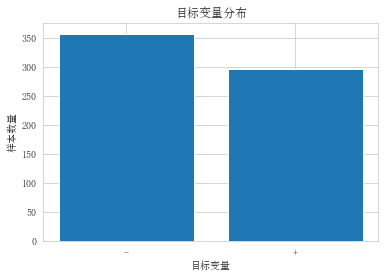

In [5]:
# 中文字体设置
plt.rcParams['font.sans-serif'] = 'SimSun'
# 统计目标变量的取值频次
target_counts = df['A16'].value_counts()

# 绘制柱状图
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('目标变量')
plt.ylabel('样本数量')
plt.title('目标变量分布')
plt.show()

# 分布平均

In [6]:
# 离散特征编码
from sklearn.preprocessing import LabelEncoder

# 标签编码
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


In [7]:
# 连续特征归一化处理
from sklearn.preprocessing import MinMaxScaler

# 归一化处理
continental_features = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

# 进行归一化处理
scaler = MinMaxScaler()
df[continental_features] = scaler.fit_transform(df[continental_features])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,0.271111,0.000000,1,0,12,7,0.043860,1,1,0.014925,0,0,0.1010,0.00000,0
1,0,0.713016,0.159286,1,0,10,3,0.106667,1,1,0.089552,0,0,0.0215,0.00560,0
2,0,0.170635,0.017857,1,0,10,3,0.052632,1,0,0.000000,0,0,0.1400,0.00824,0
3,1,0.223492,0.055000,1,0,12,7,0.131579,1,1,0.074627,1,0,0.0500,0.00003,0
4,1,0.101905,0.200893,1,0,12,7,0.060000,1,0,0.000000,0,2,0.0600,0.00000,0


In [8]:
# 特征选择
from sklearn.feature_selection import VarianceThreshold

# 使用方差选择法
selector = VarianceThreshold(threshold=0.03)  # 设置方差阈值
selected_features = selector.fit_transform(df)
selected_columns = df.columns[selector.get_support(indices=True)]

print(selected_columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13',
       'A16'],
      dtype='object')


In [9]:
selected_df = df[selected_columns]

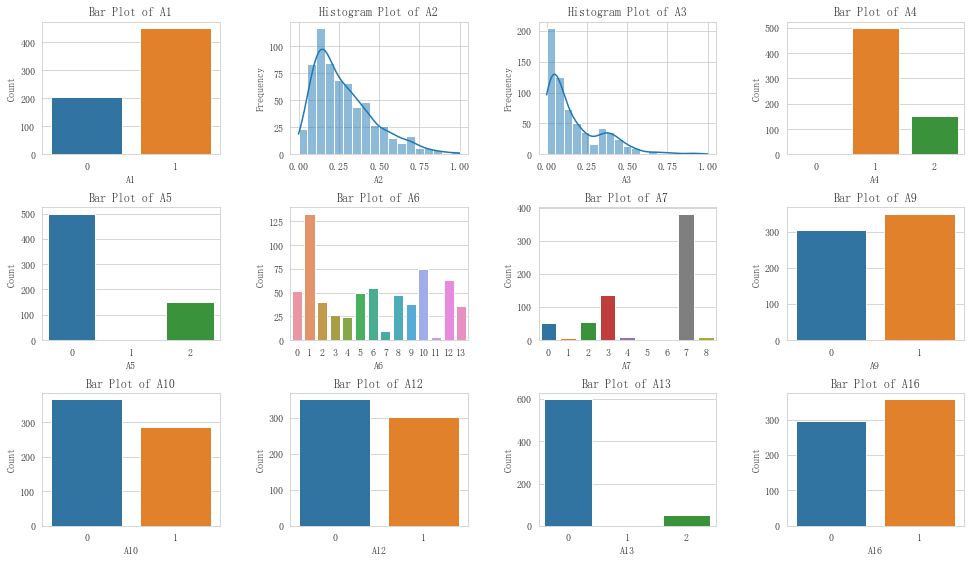

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [10]:
import seaborn as sns
# 创建一个3行4列的子图
fig, axes = plt.subplots(3, 4, figsize=(16, 10))

# 遍历每个特征进行可视化
for i,feature in enumerate(selected_columns):
    plt.figure(figsize=(8, 6))
    # 计算当前特征在子图中的位置
    row = i // 4
    col = i % 4
    # 如果是离散特征，绘制柱状图
    if feature not in continental_features:
        sns.countplot(x=feature, data=selected_df, ax=axes[row][col])
        axes[row][col].set_xlabel(feature)
        axes[row][col].set_ylabel('Count')
        axes[row][col].set_title(f'Bar Plot of {feature}')

    # 如果是连续特征，绘制直方图
    else:
        sns.histplot(x=feature, data=selected_df, kde=True, ax=axes[row][col])
        axes[row][col].set_xlabel(feature)
        axes[row][col].set_ylabel('Frequency')
        axes[row][col].set_title(f'Histogram Plot of {feature}')

# 调整子图之间的间距
fig.subplots_adjust(left=0.1, bottom=0, right=0.9, top=0.7, wspace=0.4, hspace=0.4)

# 显示图形
plt.show()

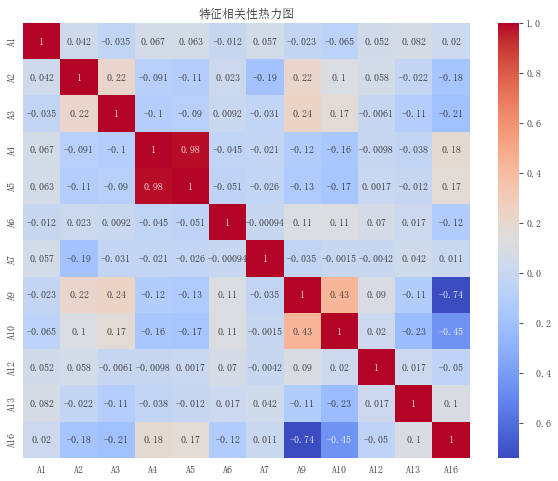

In [11]:
import warnings
warnings.filterwarnings("ignore")

# 计算特征之间的相关系数
correlation_matrix = selected_df.corr()

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('特征相关性热力图')
plt.show()

选取三种合适的机器学习方法完成预测任务
任意选择工具包
利用交叉验证法

In [12]:
# 提取特征列
X = selected_df.drop("A16",axis=1)
y = selected_df["A16"]

In [13]:
# 将数据集分为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

train_data = pd.DataFrame(X_train,y_train)
test_data = pd.DataFrame(X_test,y_test)
train_data.to_csv("train.data")
test_data.to_csv("test.data")

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 初始化分类器
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
}
# 使用k折交叉验证法，k取5
kfold = KFold(n_splits=5)

# results记录结果
results = {}
# 对不同的算法分别进行处理
for clf_name, clf in classifiers.items():
    scores =  cross_validate(clf, X, y, cv=kfold,scoring=('accuracy', 'precision', 'recall', 'f1'))
    results[clf_name] = scores

for name, score in results.items():
    print(f'{name} mean accuracy: {np.mean(score["test_accuracy"]*100)}%')
    print(f'{name} mean precision: {np.mean(score["test_precision"]*100)}%')
    print(f'{name} mean recall: {np.mean(score["test_recall"]*100)}%')
    print(f'{name} mean f1-score: {np.mean(score["test_f1"])*100}%')
    print()

DecisionTree mean accuracy: 77.1967116852613%
DecisionTree mean precision: 68.70515902563557%
DecisionTree mean recall: 75.17911565053615%
DecisionTree mean f1-score: 68.31416334481469%

KNN mean accuracy: 75.82501467997652%
KNN mean precision: 70.85452434665359%
KNN mean recall: 74.22174911592003%
KNN mean f1-score: 69.18389396305757%

RandomForest mean accuracy: 83.93423370522608%
RandomForest mean precision: 72.57898351648352%
RandomForest mean recall: 77.35401825950778%
RandomForest mean f1-score: 71.19376943280378%

LogisticRegression mean accuracy: 85.61362301820319%
LogisticRegression mean precision: 74.44882088572439%
LogisticRegression mean recall: 74.24818318196927%
LogisticRegression mean f1-score: 72.20942029405832%

SVM mean accuracy: 83.93423370522608%
SVM mean precision: 70.22887203661952%
SVM mean recall: 74.24818318196927%
SVM mean f1-score: 68.66484456903146%



对实验结果进行比较评估
对结果进行评估（自行选定结果评估的表现形式）
优化实验结果（自行选择优化方法，选做

In [15]:
# 选用雷达图进行模型对比
from pyecharts.charts import Radar
from pyecharts import options as opts

# 设置 Radar chart 的属性
colors = ["#c23531", "#2f4554", "#61a0a8", "#d48265", "#91c7ae", "#749f83"]

R = Radar()

for i,(name, score) in enumerate(results.items()):
    R.add(
        name,
        [
            [np.mean(score["fit_time"]),
            np.mean(score["score_time"]),
            np.mean(score["test_accuracy"]),
            np.mean(score["test_precision"]),
            np.mean(score["test_recall"]),
            np.mean(score["test_f1"])]
        ],
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        linestyle_opts=opts.LineStyleOpts(width=2),
        color=colors[i]
    )
R.set_global_opts(title_opts=opts.TitleOpts(title="分类器性能对比"))\
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))\
    .add_schema(
    shape="circle",
    schema=[
        opts.RadarIndicatorItem(name='Fit_time'),
        opts.RadarIndicatorItem(name='Score_time'),
        opts.RadarIndicatorItem(name='Accuracy'),
        opts.RadarIndicatorItem(name='Precision'),
        opts.RadarIndicatorItem(name='Recall'),
        opts.RadarIndicatorItem(name='F1-Score')
    ]
)
R.render("分类器性能对比.html")

'D:\\hzh\\黄子浩大帅哥专用\\机器学习\\final exam\\分类器性能对比.html'

In [16]:
# 对accuracy表现较好的随机森林模型调参
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=666)
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=kfold, scoring=('accuracy', 'precision', 'recall', 'f1'), refit="accuracy")
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
# 重新训练模型
best_model = grid_search.best_estimator_

newRF_results =  cross_validate(best_model,X,y,cv= kfold,scoring=('accuracy', 'precision', 'recall', 'f1'))

print(f"Accuracy: {newRF_results['test_accuracy'].mean()*100}%",)
print(f"Precision: { newRF_results['test_precision'].mean()*100}%")
print(f"Recall:{newRF_results['test_recall'].mean()*100}% " )
print(f"F1 Score:{newRF_results['test_f1'].mean()*100}% " )

Accuracy: 83.93305930710511%
Precision: 74.20037094821352%
Recall:77.93458257351861% 
F1 Score:72.221246713927% 


In [18]:
# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

svm = SVC(random_state=666)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=kfold, scoring=('accuracy', 'precision', 'recall', 'f1'), refit="accuracy")

# 在训练集上进行参数搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [19]:
# 重新训练模型
best_SVMmodel = grid_search.best_estimator_

newSVM_results =  cross_validate(best_model,X,y,cv= kfold,scoring=('accuracy', 'precision', 'recall', 'f1'))

print(f"Accuracy: {newSVM_results['test_accuracy'].mean()*100}%",)
print(f"Precision: { newSVM_results['test_precision'].mean()*100}%")
print(f"Recall:{newSVM_results['test_recall'].mean()*100}% " )
print(f"F1 Score:{newSVM_results['test_f1'].mean()*100}% " )

Accuracy: 83.93305930710511%
Precision: 74.20037094821352%
Recall:77.93458257351861% 
F1 Score:72.221246713927% 
